In [1]:
# To mount the colab notebook to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# To Unzip the zip file
!unzip gdrive/My\ Drive/Machine_Learning_Group_Project/Group_Project_Data_2.zip   > /dev/null

In [3]:
# Module Imports
import tensorflow as tf
import numpy as np
import time 
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks, regularizers
from sklearn.model_selection import train_test_split


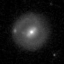

In [4]:
img = tf.keras.preprocessing.image.load_img('Group_Project_Data/Train/Real/img_0.png')
img

In [5]:
# Define the image directory path
image_dir_train = "Group_Project_Data/Train"
image_dir_valid = "Group_Project_Data/Valid"


In [6]:
# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

In [7]:
# Create the dataset using the image directory path
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=image_dir_train,
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=image_dir_valid,
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
)

# Print the class names
class_names = train_dataset.class_names
print(class_names)

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
['Fake', 'Real']


In [8]:
# Load the training data 
x_train = []
y_train = []
for images, labels in train_dataset:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)


In [9]:
# Load the validation data 
x_val = []
y_val = []
for images, labels in val_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())

x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [10]:
# Rescale the pixel values
x_train = x_train/255.
x_val = x_val/255.

In [11]:
# Creating model
model = models.Sequential([
    layers.Flatten(input_shape=x_train.shape[1:]),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 19,267,970
Trainable params: 19,267,970
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset,batch_size =32, epochs=20)
print(history.history.keys)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 [==============================] - 14s 46ms/step - loss: 755.4557 - accuracy: 0.6025 - val_loss: 222.4976 - val_accuracy: 0.7040
Epoch 2/20
188/188 [==============================] - 7s 37ms/step - loss: 207.5381 - accuracy: 0.6792 - val_loss: 401.6024 - val_accuracy: 0.5670
Epoch 3/20
188/188 [==============================] - 8s 43ms/step - loss: 226.1284 - accuracy: 0.6763 - val_loss: 370.9483 - val_accuracy: 0.5875
Epoch 4/20
188/188 [==============================] - 8s 43ms/step - loss: 175.1630 - accuracy: 0.7003 - val_loss: 75.4927 - val_accuracy: 0.7785
Epoch 5/20
188/188 [==============================] - 7s 36ms/step - loss: 178.1330 - accuracy: 0.7010 - val_loss: 96.8869 - val_accuracy: 0.7335
Epoch 6/20
188/188 [==============================] - 8s 43ms/step - loss: 121.6412 - accuracy: 0.7322 - val_loss: 87.5667 - val_accuracy: 0.7440
Epoch 7/20
188/188 [==============================] - 8s 41ms/step - loss: 119.1031 - accuracy: 0.7137 - val_loss: 97.4244 - val_ac

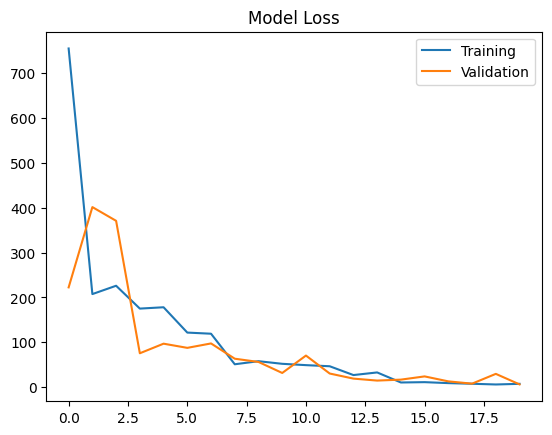

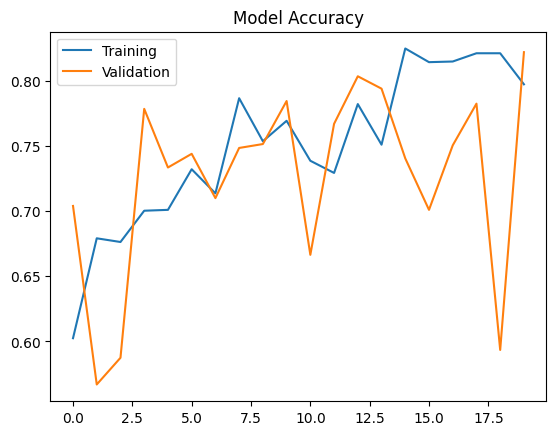

63/63 [==============================] - 1s 12ms/step


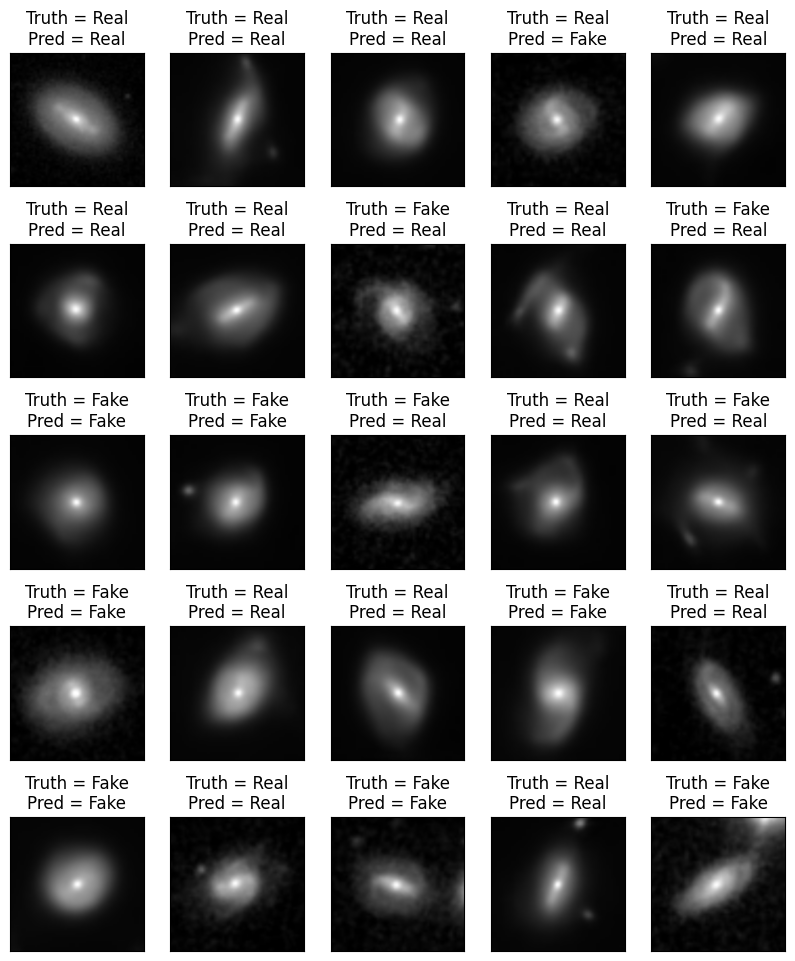

In [14]:
# Plot for Model Loss
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

# Plot for Model Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

# Testing the model to predict 
y_pred = model.predict(x_val)
y_pred_label = np.argmax(y_pred, axis=1)

# Plotting images with labels telling the truth and predicted values with some 
# testing images for each class
f, ax = plt.subplots(5,5, figsize=(10, 12))
ax = ax.flatten()

# Looping the selected images from each class to show on the plot
for i in range(25):
    ax[i].imshow(x_train[i,:,:])
    ax[i].set_title(f'Truth = {class_names[np.argmax(y_val[i])]}\nPred = {class_names[y_pred_label[i]]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()
